In [2]:
import mysql.connector
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt

# Connect to the MySQL database
cnx = mysql.connector.connect(
    host='localhost',
    user='root',
    password='hannibal1999',
    database='lotech'
)
cursor = cnx.cursor()



query = "SELECT total_price, quantity FROM order_details"
cursor.execute(query)
rows = cursor.fetchall()
prices = [row[0] for row in rows]
quantities = [row[1] for row in rows]




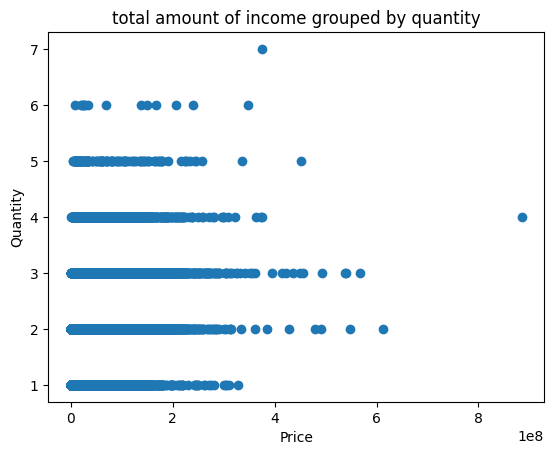

In [3]:
plt.scatter(prices, quantities)
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('total amount of income grouped by quantity')
plt.show()


In [4]:
df_total = pd.DataFrame(rows , columns=['total_price' , 'quantity'])
df_total.to_csv("request_12_total.csv", index=False)

In [5]:

query = "SELECT price, quantity FROM order_details"
cursor.execute(query)
rows = cursor.fetchall()
prices = [row[0] for row in rows]
quantities = [row[1] for row in rows]

df_price = pd.DataFrame(rows , columns=['price' , 'quantity'])
df_price.to_csv("request_12.csv", index=False)

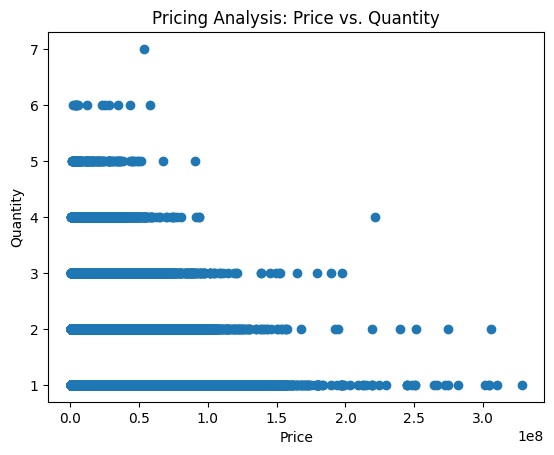

In [6]:
plt.scatter(prices, quantities)
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Pricing Analysis: Price vs. Quantity')
plt.show()

In [7]:
import matplotlib.pyplot as plt

query = """SELECT quantity , sum(total_price) FROM order_details
group by quantity
order by quantity desc ;"""
cursor.execute(query)
rows = cursor.fetchall()

# Extract price and quantity data from the retrieved rows
prices = [row[0] for row in rows]
quantities = [row[1] for row in rows]

df = pd.DataFrame(rows , columns=[ 'quantity', 'total_price_sum'])



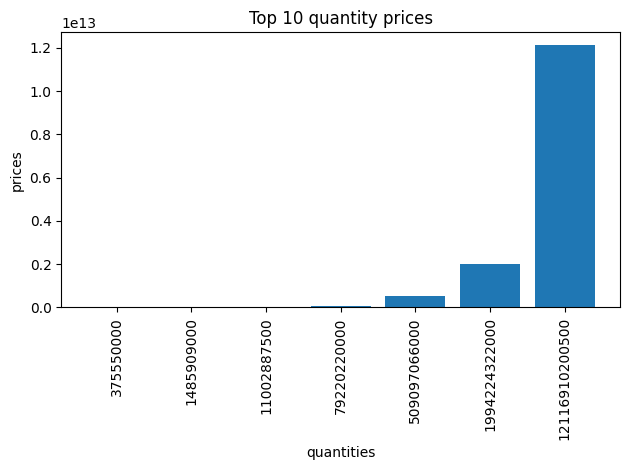

In [8]:
import matplotlib.pyplot as plt
quantites = df['quantity']
price = df['total_price_sum']
plt.bar(range(len(quantities)), price)
plt.xticks(range(len(quantities)), quantities, rotation='vertical')
plt.xlabel('quantities')
plt.ylabel('prices')
plt.title('Top 10 quantity prices')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

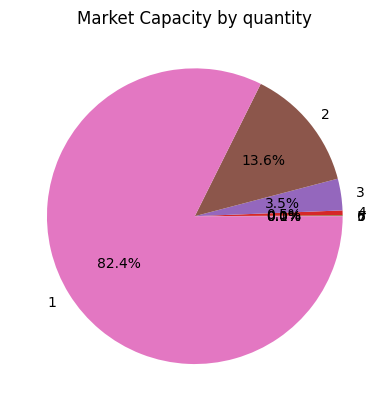

In [9]:
import matplotlib.pyplot as plt
plt.pie( df['total_price_sum'] , labels=df['quantity'], autopct='%1.1f%%')
plt.title('Market Capacity by quantity')
plt.show()

In [10]:
cursor.close()
cnx.close()